# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## <span style="color:blue">  Numerical exercises 1</span>

### Exercise 01.1
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. <font color="red">Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

<span style="color:green"> Si generano $M$ numeri casuali uniformemente in $[0,1)$, li si divide in $N$ blocchi e di ciascun blocco si calcolano media e media al quadrato.
Si calcolano la media e la deviazione standard dei valori medi ottenuti da ciascun blocco al crescere del numero di blocchi considerati: 
il primo valor medio che si ottiene è la media del primo blocco $A_1$ e la sua deviazione standard è zero, il secondo valor medio è la media dei valori medi dei primi due blocchi $A_1$ e $A_2$ e la deviazione standard si calcola con la formula:

<span style="color:green">
$$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]} $$
</p>

<span style="color:green">
con $N=2$, e si procede così fino a cosiderare tutti gli $N$ blocchi. Questo modo di stimare la deviazione standard è detto **"blocking method"**.

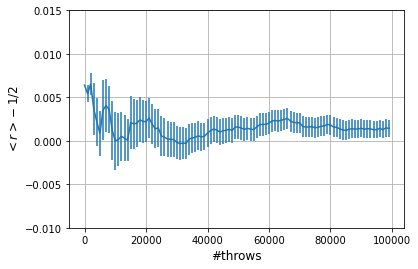

In [33]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

M=100000              # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N
x = np.arange(N)      # [0,1,2,...,N-1]
    
x*=L # Number of throws = block * (Number of throws in each block)
sum_prog = np.loadtxt("sum_prog1.txt") 
err_prog = np.loadtxt("err_prog1.txt")
#plt.figure(figsize=(10,6))
plt.errorbar(x,sum_prog-0.5,yerr=err_prog)
plt.xlabel('#throws', fontsize=12)
plt.ylim(-0.010,0.015)
plt.ylabel('$<r>-1/2$', fontsize=12)
plt.grid(True)
plt.show()

<span style="color:green">
Nel grafico si vede come al crescere del numero di blocchi (e quindi di numeri random) considerati, la differenza $<r>-1/2$ si discosta sempre meno da zero (come previsto).

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. <font color="red">Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

<span style="color:green"> 
Tutto come sopra, eccetto che al posto di $<r>$ si calcola $<(r-0.5)^2>$.

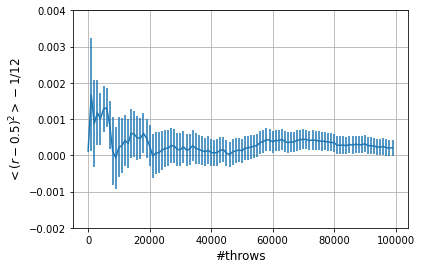

In [34]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

M=100000              # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N
x = np.arange(N)      # [0,1,2,...,N-1]
    
x*=L # Number of throws = block * (Number of throws in each block)
sum_prog = np.loadtxt("sum_prog2.txt") 
err_prog = np.loadtxt("err_prog2.txt")
#plt.figure(figsize=(10,6))
plt.errorbar(x,sum_prog-1/12,yerr=err_prog)
plt.xlabel('#throws', fontsize=12)
plt.ylim(-0.002,0.004)
plt.ylabel('$<(r-0.5)^2>-1/12$', fontsize=12)
plt.grid(True)
plt.show()

<span style="color:green">
Nel grafico si vede come al crescere del numero di blocchi (e quindi di numeri random) considerati, la differenza $<(r-0.5)^2>-1/12$ si discosta sempre meno da zero (come previsto).

The hypothesis is that the numbers $r$ are drawn from a uniform distribution. In Statistics we cannot prove that some random events are drawn from a particular distribution (Note, in fact, that such hypothesis is false: pseudo-random numbers are drawn from a deterministic algorithm!); we can try to estimate the probability that $r$ **are not** drawn from a uniform distribution. If this probability is low, we can safely reject this last hypothesis.
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
Pearson's cumulative test statistic $\chi^2$ is a measure of the error between observations, $O_i$, and expected values, $E_i$:
$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$
The numerator is a squared distance between observations, $O_i$, and expected values, $E_i$, and thus should be compared (at the denominator) with the expected squared fluctuations (variance) of the relative distribution. Why variance = $E_i$? 
The probability of getting exactly $k$ (independent) successes, each one with probability $p$, in $n$ trials is given by the Binomial distribution (see <a href="https://en.wikipedia.org/wiki/Binomial_distribution">this Wikipedia link</a>):
$$Pr(X=k) = {{n}\choose{k}} p^k (1-p)^{n-k} = \frac{n!}{k! (n-k)!} p^k (1-p)^{n-k}$$
The average of the Binomial distribution is $\langle X \rangle = np$, the variance is: $\sigma^2 = np (1-p)$. Thus if $p$ is small we have that $\sigma^2 \simeq np$, that is $\sigma^2 \simeq \langle X \rangle$ and this explains the denominator $E_i$ in $\chi^2$
</p>

3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. <font color="red">Plot $\chi^2_j$ for $j=1, ..., 100$</font>. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely ... <font color="red">but before judging</font>, you could compare the histogram of the values obtained for $\chi^2_j$ with the true probability distribution (see: <a href="https://en.wikipedia.org/wiki/Chi-squared_distribution">this Wikipedia link</a>).

<span style="color:green">
Si generano 10000 numeri casuali in [0,1), divisi in blocchi da 100 e si conta quanti di questi numeri cadono in ciascuno dei 100 sottointervalli in cui è diviso l'intervallo [0,1) (gli $n_{i}$ nella formula sopra); si calcola il $\chi^2$ per ciascun blocco con la formula indicata sopra e successivamente si fa la media sui 100 blocchi. Si ripete il tutto 100 volte, salvando ogni volta il valore medio finale del $\chi^2$.

χ^2 medio: 99.5756
val atteso: k = 100
dev std:  13.26333278780262
val atteso: (2k)^(1/2) = 14.142135623730951


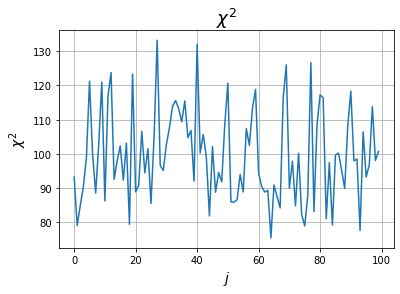

In [35]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

N=100
x=np.arange(N)

y= np.loadtxt('chi2.txt')
#plt.figure(figsize=(10,6))
plt.plot(x,y)
plt.xlabel('$j$', fontsize=14)
plt.ylabel('$\chi^2$', fontsize=14)
plt.title('$\chi^2$', fontsize=18)
print(chr(967) + '^2 medio:', np.mean(y))
print('val atteso: k = 100')
print('dev std: ', np.std(y))
print('val atteso: (2k)^(1/2) =', np.sqrt(200))
plt.grid(True)

plt.show()

<span style="color:green">
Confrontando i valori attesi con quelli ottenuti dalla simulazione si può ritenere valida l'assunzione che i valori di $r$ siano generati da una distribuzione uniforme.

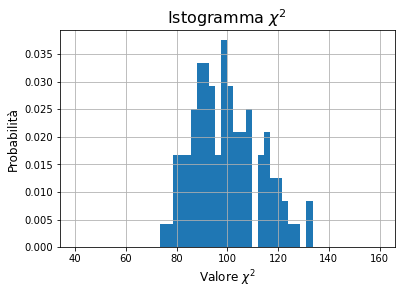

In [23]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
n_bins = 50

x= np.loadtxt('chi2.txt')
fig, ax = plt.subplots()
n, bins, patches = ax.hist(x, n_bins, density=True, range=(40,160))
plt.xlabel('Valore $\chi^2$', fontsize=12)
plt.ylabel('Probabilità', fontsize=12)
plt.title('Istogramma $\chi^2$', fontsize=16)
plt.grid(True)

plt.show()

<span style="color:green">
Come ci si aspetta il valore più probabile è 100.

### Exercise 01.2
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:

1. <font color="red">Add two probability distributions</font> by using the **method of the inversion of the cumulative distribution** to sample from a **generic** <font color="red">exponential distribution</font>, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** <font color="red">Cauchy-Lorentz distribution</font> $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).
2. <font color="red">Make 3 pictures</font> with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note tha you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

<span style="color:green">
Come visto a lezione, per ottenere una variabile x distribuita secondo una distribuzione esponenziale o di Cauchy-Lorentz con il metodo dell'inversione, partendo da una y generata uniformemente in [0,1), si ottiene rispettivamente:
   $ x = -\frac{1}{\lambda}\ln(1-y)$ e $ x = \mu + \Gamma \tan\left[\pi\left(y-\frac{1}{2}\right)\right] $.
   

In [5]:
from scipy.optimize import curve_fit

def Gauss(x,a,b,c):  # defining the fitting function
    return a * np.exp(-b*(x-c)**2)

<function matplotlib.pyplot.show(close=None, block=None)>

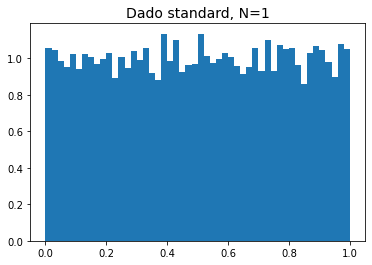

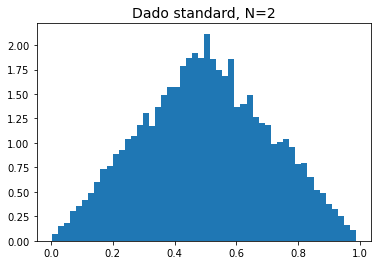

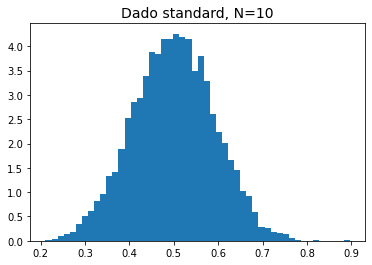

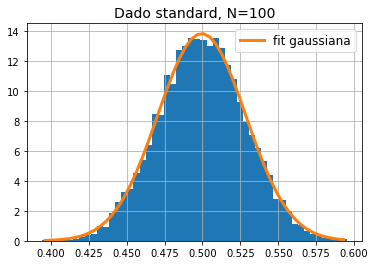

In [28]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
n_bins = 50


x1s = np.loadtxt('N=1.txt', delimiter=' ', usecols=(0))
x2s = np.loadtxt('N=2.txt', delimiter=' ', usecols=(0))
x10s = np.loadtxt('N=10.txt', delimiter=' ', usecols=(0))
x100s = np.loadtxt('N=100.txt', delimiter=' ', usecols=(0))
fig, ax1 = plt.subplots()
fig, ax2 = plt.subplots()
fig, ax10 = plt.subplots()
fig, ax100 = plt.subplots()
n, bins, patches = ax1.hist(x1s, n_bins, density=True)
n, bins, patches = ax2.hist(x2s, n_bins, density=True)
n, bins, patches = ax10.hist(x10s, n_bins, density=True)
n, bins, patches = ax100.hist(x100s, n_bins, density=True)

x = [(bins[i]+bins[i+1])/2 for i in range(n_bins)]
p_opt, p_cov = curve_fit(Gauss,x,n)
y_fit = Gauss(x,p_opt[0],p_opt[1],p_opt[2])

ax100.plot(x,y_fit, linewidth=3, label='fit gaussiana')
ax100.legend(fontsize=12)
ax1.set_title('Dado standard, N=1', fontsize=14)
ax2.set_title('Dado standard, N=2', fontsize=14)
ax10.set_title('Dado standard, N=10', fontsize=14)
ax100.set_title('Dado standard, N=100', fontsize=14)
plt.grid(True)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

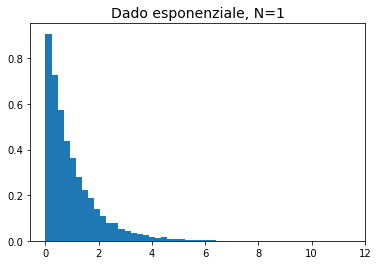

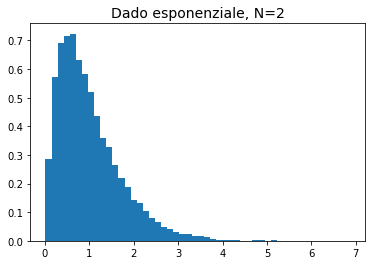

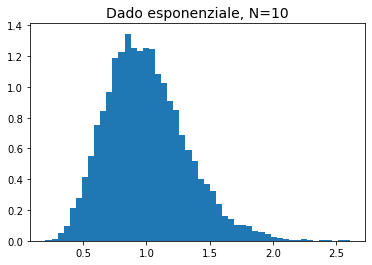

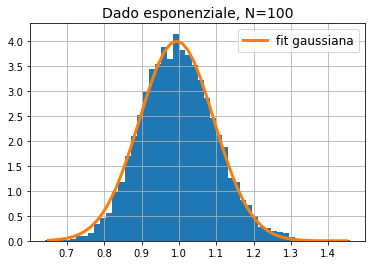

In [29]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
n_bins = 50


x1e = np.loadtxt('N=1.txt', delimiter=' ', usecols=(1))
x2e = np.loadtxt('N=2.txt', delimiter=' ', usecols=(1))
x10e = np.loadtxt('N=10.txt', delimiter=' ', usecols=(1))
x100e = np.loadtxt('N=100.txt', delimiter=' ', usecols=(1))
fig, ax1 = plt.subplots()
fig, ax2 = plt.subplots()
fig, ax10 = plt.subplots()
fig, ax100 = plt.subplots()
n, bins, patches = ax1.hist(x1e, n_bins, density=True)
n, bins, patches = ax2.hist(x2e, n_bins, density=True)
n, bins, patches = ax10.hist(x10e, n_bins, density=True)
n, bins, patches = ax100.hist(x100e, n_bins, density=True)

x = [(bins[i]+bins[i+1])/2 for i in range(n_bins)]
p_opt, p_cov = curve_fit(Gauss,x,n)
y_fit = Gauss(x,p_opt[0],p_opt[1],p_opt[2])

ax100.plot(x,y_fit, linewidth=3, label='fit gaussiana')
ax100.legend(fontsize=12)
ax1.set_title('Dado esponenziale, N=1', fontsize=14)
ax2.set_title('Dado esponenziale, N=2', fontsize=14)
ax10.set_title('Dado esponenziale, N=10', fontsize=14)
ax100.set_title('Dado esponenziale, N=100', fontsize=14)
plt.grid(True)

plt.show

In [8]:
from scipy.optimize import curve_fit

# defining the fitting function
def C_L(x,a,b,c):
    return a/(b+(x-c)**2)

<function matplotlib.pyplot.show(close=None, block=None)>

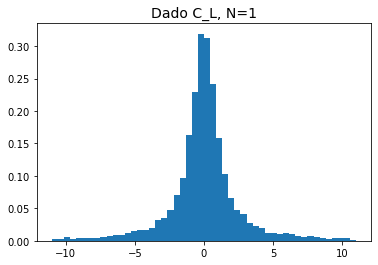

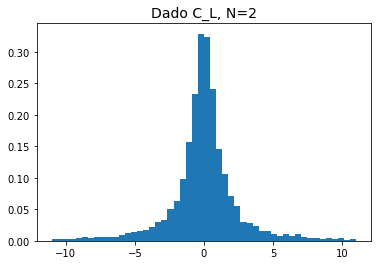

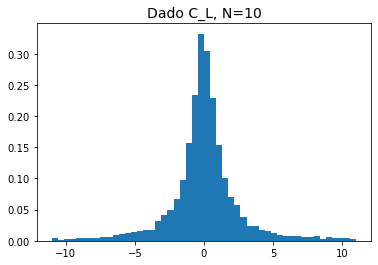

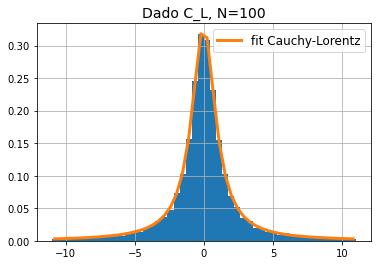

In [30]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
n_bins = 50


x1cl = np.loadtxt('N=1.txt', delimiter=' ', usecols=(2))
x2cl = np.loadtxt('N=2.txt', delimiter=' ', usecols=(2))
x10cl = np.loadtxt('N=10.txt', delimiter=' ', usecols=(2))
x100cl = np.loadtxt('N=100.txt', delimiter=' ', usecols=(2))
fig, ax1 = plt.subplots()
fig, ax2 = plt.subplots()
fig, ax10 = plt.subplots()
fig, ax100 = plt.subplots()
n, bins, patches = ax1.hist(x1cl, n_bins, density=True, range=(-11,11))
n, bins, patches = ax2.hist(x2cl, n_bins, density=True, range=(-11,11))
n, bins, patches = ax10.hist(x10cl, n_bins, density=True, range=(-11,11))
n, bins, patches = ax100.hist(x100cl, n_bins, density=True, range=(-11,11))

x = [(bins[i]+bins[i+1])/2 for i in range(n_bins)]
p_opt, p_cov = curve_fit(C_L,x,n)
y_fit = C_L(x,p_opt[0],p_opt[1],p_opt[2])

ax100.plot(x,y_fit, linewidth=3, label='fit Cauchy-Lorentz')
ax100.legend(fontsize=12)
ax1.set_title('Dado C_L, N=1', fontsize=14)
ax2.set_title('Dado C_L, N=2', fontsize=14)
ax10.set_title('Dado C_L, N=10', fontsize=14)
ax100.set_title('Dado C_L, N=100', fontsize=14)
plt.grid(True)

plt.show

<span style="color:green">
Il teorema del limite centrale afferma che la somma $S_{N}$ di $N$ variabili casuali $x_{n}$ indipendenti e identicamente distribuite tende a una distribuzione gaussiana nel limite di $N$ che tende a infinito, a patto che il suo primo e secondo momento siano finiti. Questo è ciò che si verifica nel caso del dado standard o del dado esponenziale. Nel caso del dado C-L, invece, il secondo momento è infinito e nel limite di $N$ grande  la somma $S_{N}$ tende alla distribuzione di Cauchy-Lorentz.   

### Exercise 01.3
- **Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
<font color="red">Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.

<span style="color:green"> Essendoci invarianza traslazionale sono state scelte come variabili la distanza $X$ in $[0,D/2]$ del centro della barra dalla linea più vicina (essendo $D$ la distanza tra le linee) e l'angolo di inclinazione $\theta$ (ad esempio rispetto all'orizzontale considerando le linee verticali) in $[0,\pi/2]$.
Per il calcolo di $\pi$ (da usare nella generazione dell'angolo $\theta$) si è sfruttata la tecnica del rigetto, considerando il quadrato di area unitaria e il corrispondente quarto di cerchio di raggio unitario e area pari a $\pi/4$: generando coppie di coordinate $(x,y)$ entrambe nel range $[0,1]$, si contano come casi favorevoli solamente i punti che cadono dentro il cerchio, ovvero tali per cui $x^2+y^2<1$ e si calcola l'area del quarto di cerchio come rapporto di casi favorevoli su casi possibili.

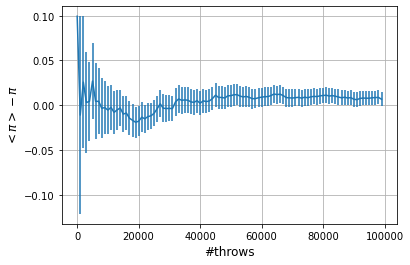

In [37]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

M=100000              # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N
x = np.arange(N)      # [0,1,2,...,N-1]
    
x*=L # Number of throws = block * (Number of throws in each block)
sum_prog = np.loadtxt("sum_prog3.txt") 
err_prog = np.loadtxt("err_prog3.txt")
#plt.figure(figsize=(10,6))
plt.errorbar(x,sum_prog-np.pi,yerr=err_prog)
plt.xlabel('#throws', fontsize=12)
#plt.ylim(-0.010,0.015)
plt.ylabel('$<\pi>-\pi$', fontsize=12)
plt.grid(True)
plt.show()

<span style="color:green">
Nel grafico si vede come al crescere del numero di blocchi (e quindi di numeri random) considerati, la differenza $<\pi>-\pi$ si discosta sempre meno da zero (come previsto).

### <span style="color:blue">Computing statistical uncertainties: the blocking method</span>
- A fundamental step in every Monte Carlo calculation is the estimation of its statistical uncertainty, **it's a must!** Your task would not be completed if you had not calculated it.

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    In computing the statistical uncertainties, i.e. the standard deviation of the mean, you need an estimation of the variance $\sigma^2$, the second central moment. First of all note that the variance can be computed from
    $$\sigma^2_A := \langle (A-\langle A\rangle)^2\rangle = \langle A^2 \rangle -\langle A\rangle^2 $$
    What is the best way to estimate $\sigma^2_A$? Imagine that your Monte Carlo estimation of $A$ is obtained from a calculation which uses $M$ Monte Carlo "steps" (intentionally, here I am generic because what is a single "step" in a Monte Carlo calculation strictly depends on the specific calculation); you can always divide such $M$ Monte Carlo "steps" in $N$ blocks, with $N<M$. In each block, you can use your $M/N$ Monte Carlo "steps" to obtain an estimate of $A$, let me call it $A_i$ with $i=1,N$, and then you have also $A^2_i$ with $i=1,N$.
    At this point everything becomes clear:
    $$ \langle A^2 \rangle \simeq \frac{1}{N} \sum_{i=1}^N A^2_i \quad \quad \langle A\rangle^2 \simeq \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 $$
    and finally the statistical uncertainty with $N$ :
    $$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]} $$
</p>

- <font color="blue">In a Monte Carlo calculation, you can use the arguments above to outputting an estimate of A and its statistical uncertainty on the fly, during your calculation. You will be able to do this every $M/N$ steps, and thus, in the end, $N$ times</font>. Note that after the first $M/N$ Monte Carlo steps, at the end of the first block, your estimation of the uncertainty is not computable, so set it to zero and compute it only from the second block. **Question**: $N$ can be chosen in many ways ... what are the limitations regarding this choice?